# Correlation Analysis
Analysis of the correlation between genes. We focus on "gene groups", a collection of genes that have identical trinary expression values.

In [1]:
import init
from common import constants as cn
from common.trinary_data import TrinaryData
from common_python.plots import util_plots
from plots import util_plots as xutil_plots

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
data = TrinaryData()
data.df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
T1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


/home/ubuntu/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


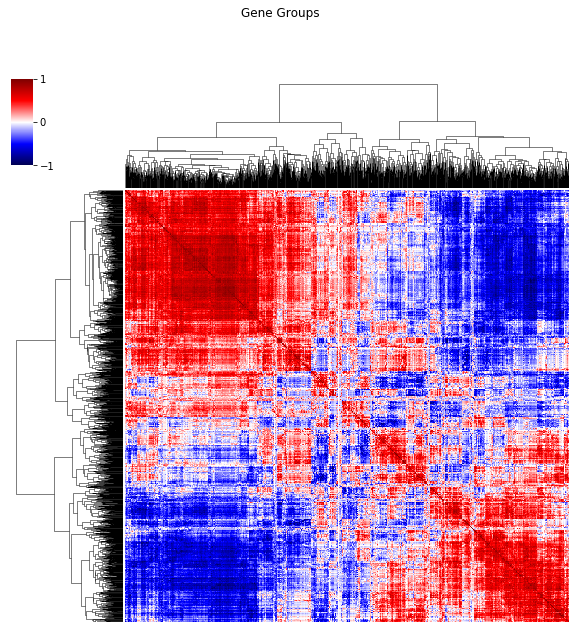

In [3]:
cg = util_plots.plotCorr(data.df_X, title="Gene Groups")

## Identify Correlation Groups

/home/ubuntu/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


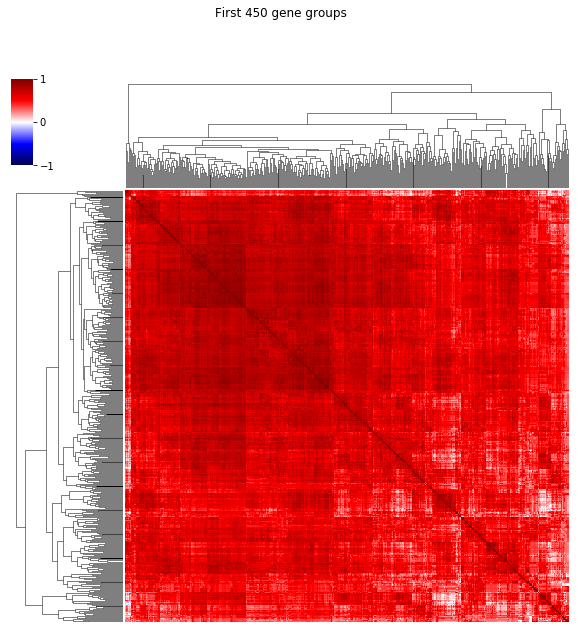

In [4]:
size = 450
columns = cg.dendrogram_row.reordered_ind[0:size]
_ = util_plots.plotCorr(data.df_X[columns], title="First %d gene groups" % size)
features = [data.features[c] for c in columns]

In [5]:
def plotGroupExpression(data, columns, title):
    df_sub = data.df_X[columns]
    ser_mean = df_sub.mean(axis=1)
    ser_std = df_sub.std(axis=1) / np.sqrt(len(df_sub))
    fig, ax = plt.subplots()
    xv = [int(s[1:]) for s in df_sub.index]
    ax.bar(xv, ser_mean, yerr=ser_std, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_xlabel("Time")
    ax.set_ylabel("Expression")
    ax.set_title(title)
    ax.set_ylim([-1, 1])
    xutil_plots.plotStateTransitions(ax=ax)

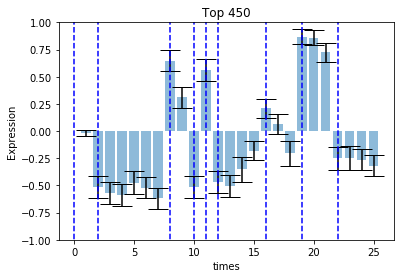

In [6]:
plotGroupExpression(data, columns, "Top 450")

/home/ubuntu/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


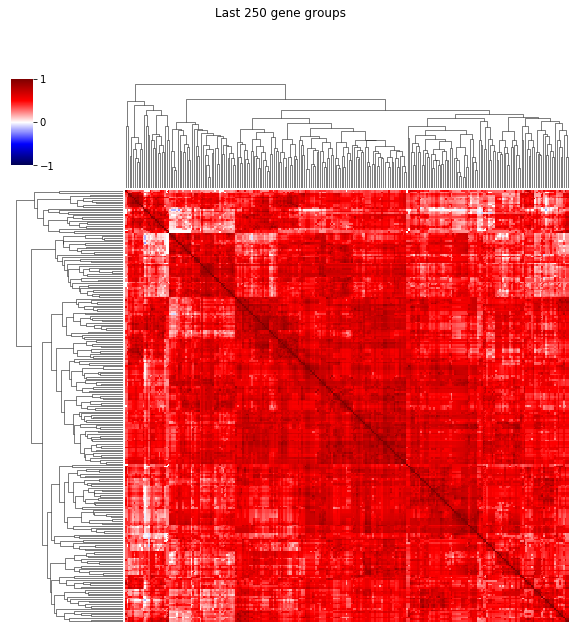

In [7]:
size = 250
columns = cg.dendrogram_row.reordered_ind[-size:-1]
_ = util_plots.plotCorr(data.df_X[columns], title="Last %d gene groups" % size)

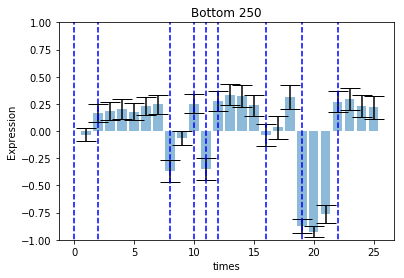

In [8]:
plotGroupExpression(data, columns, "Bottom %d" % size)

**Questions**
1. Which states do each correlation block occur in? (avg expression value with std)
1. Can we do tree feature selection from correlation blocks?